In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import yfinance

import sys
sys.path.append("../quant_research_toolbox")
from strategies import *
from utils import *
from risk import *
from plots import *

In [3]:
df_aapl = load_ticker_data("AAPL", start_date="2015-01-01", end_date="2025-06-01")
df_aapl.head()

/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker_name, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume,ohlc_price,typical_price,median_price
Date,,,,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400,24.410213,24.298209,24.303022
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000,23.804277,23.719857,23.777618
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400,23.596560,23.572493,23.555461
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,23.873701,23.893140,23.870924
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000,24.546839,24.640331,24.531843


/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.6248213032112631' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  profit[sell_date] = (


<Axes: xlabel='Date'>

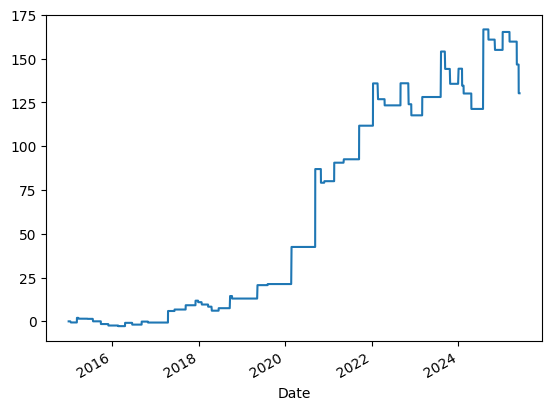

In [4]:
df_sc = Momentum.sma_crossover(df_aapl, "ohlc_price")
df_sc["cumulative_returns"].plot()

<Axes: xlabel='Date'>

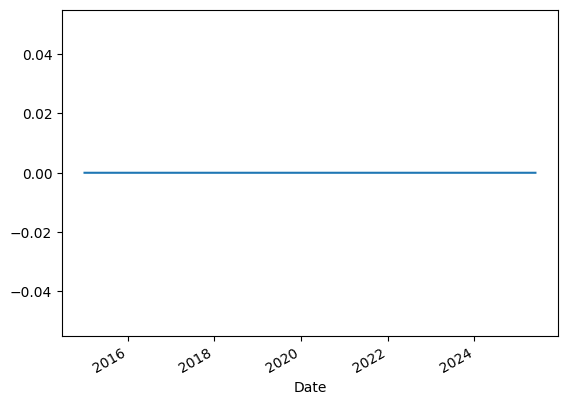

In [5]:
df_nm = Momentum.naive_momentum(df_aapl, "ohlc_price")
df_nm["cumulative_returns"].plot()

/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.06942460835324837' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  profit[sell_date] = (


<Axes: xlabel='Date'>

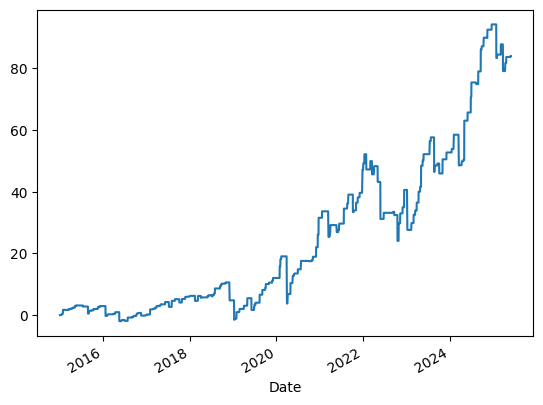

In [6]:
df_mr = MeanReversion.sma_mean_reversion(df_aapl, "ohlc_price")
df_mr["cumulative_returns"].plot()

In [7]:
Drawdown.max_drawdown(df_mr["cumulative_returns"])

-1.609715378260743